<a href="https://colab.research.google.com/github/kushpareek/Movie-recommender-system/blob/main/Recommender_System_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
if (!requireNamespace("recommenderlab", quietly = TRUE)) {
    install.packages('Metrics')
  install.packages("recommenderlab")
    install.packages('recosystem')

}
library(recommenderlab)
library('Metrics')
library('recosystem')
data(MovieLense) ## get the data
str(MovieLense)



Formal class 'realRatingMatrix' [package "recommenderlab"] with 2 slots
  ..@ data     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:99392] 0 1 4 5 9 12 14 15 16 17 ...
  .. .. ..@ p       : int [1:1665] 0 452 583 673 882 968 994 1386 1605 1904 ...
  .. .. ..@ Dim     : int [1:2] 943 1664
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:943] "1" "2" "3" "4" ...
  .. .. .. ..$ : chr [1:1664] "Toy Story (1995)" "GoldenEye (1995)" "Four Rooms (1995)" "Get Shorty (1995)" ...
  .. .. ..@ x       : num [1:99392] 5 4 4 4 4 3 1 5 4 5 ...
  .. .. ..@ factors : list()
  ..@ normalize: NULL


In [77]:
## look at the first few ratings of the second user, by converting this into a list data structure (and taking the head)
cat("First few ratings of second user:\n")

First few ratings of second user:


In [78]:
head(as(MovieLense[2,], "list")[[1]])

Toy Story (1995)      Richard III (1995) Mighty Aphrodite (1995) 
                      4                       2                       4 
     Postino, Il (1994)   Antonia's Line (1995)    Birdcage, The (1996) 
                      4                       3                       4

In [79]:
cat("\n Average rating of all users:", mean(rowMeans(MovieLense)))


 Average rating of all users: 3.587565

In [80]:
## let's calculate the average rating by each user
userMeanRatings<-rowMeans(MovieLense)


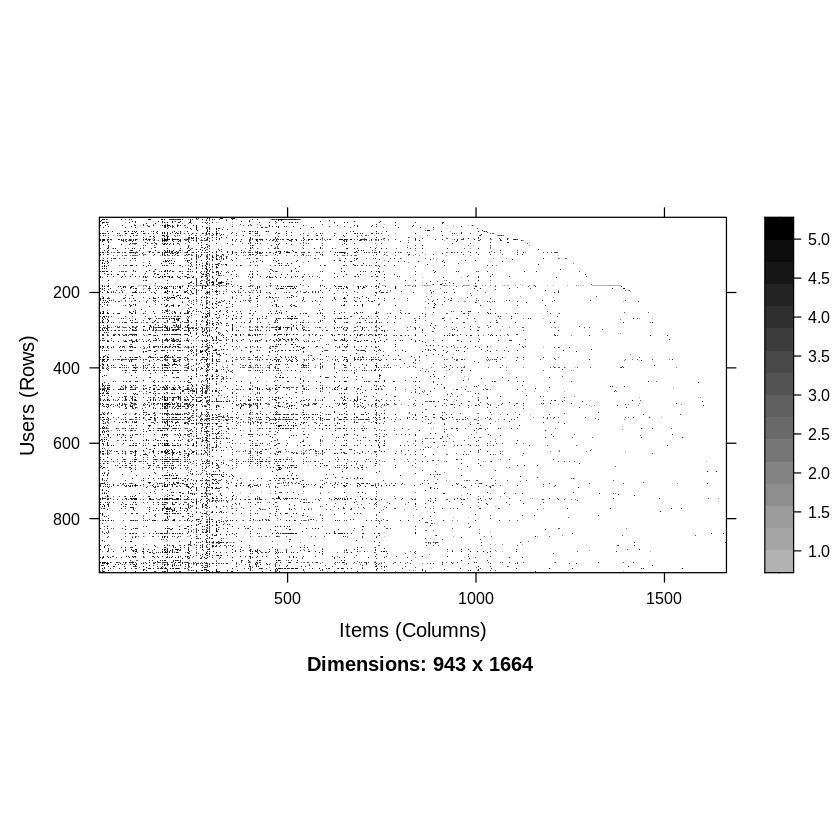

In [81]:
image(MovieLense[1:943,1:1664]) #all users, all movies

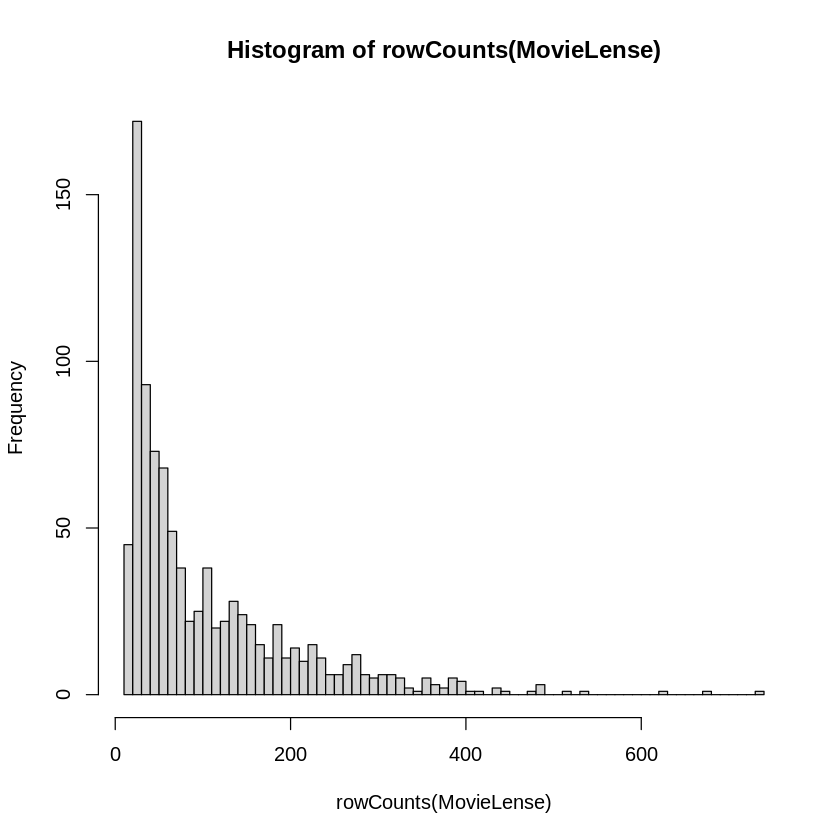

In [82]:
## histogram of the number of ratings per user, row = user
hist(rowCounts(MovieLense), breaks=100)

In [83]:
cat("Number of ratings per user:\n")

Number of ratings per user:


In [84]:
summary(rowCounts(MovieLense)) #basic statistics on count

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   19.0    32.0    64.0   105.4   147.5   735.0 

In [85]:
head(MovieLenseMeta)


,title,year,url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,⋯,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Toy Story (1995),1995,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995),0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [86]:
set.seed(2)
ml.matrix <- as(MovieLense, "matrix") #convert the data into a 943 x 1664 matrix
mask <- sample(c(0,1), 1664*943, replace=TRUE, prob=c(.2, .8)) # entries with a '0' will be held-out
mask <- matrix(mask, nrow = 943, byrow = TRUE) # do this for 20%
ml.train <- ml.matrix
ml.train[mask==0] <- NA #if mask '0', ignore the entry
ml.test <- ml.matrix
ml.test[mask==1] <- NA #if mask '1', ignore the entry
rm(mask)

In [87]:
ml.matrix[1,268:273]

Full Monty, The (1997)           Gattaca (1997) Starship Troopers (1997) 
                       5                        5                        2 
Good Will Hunting (1997)              Heat (1995)           Sabrina (1995) 
                       3                       NA                       NA

In [88]:
ml.train[1,268:273]

Full Monty, The (1997)           Gattaca (1997) Starship Troopers (1997) 
                       5                       NA                        2 
Good Will Hunting (1997)              Heat (1995)           Sabrina (1995) 
                      NA                       NA                       NA

In [89]:
ml.test[1,268:273]

Full Monty, The (1997)           Gattaca (1997) Starship Troopers (1997) 
                      NA                        5                       NA 
Good Will Hunting (1997)              Heat (1995)           Sabrina (1995) 
                       3                       NA                       NA

In [90]:
movie.genres <- MovieLenseMeta[,4:22]
head(movie.genres)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
ml.train.clean<-ml.train #use this to get the total rating by user for movies in each genre
ml.train.clean[is.na(ml.train.clean)] <- 0
user.genres.sum <- ml.train.clean %*% as.matrix(movie.genres)
ml.train.bin <- ml.train.clean #use this to get the count of movies rated for each genres by each user
ml.train.bin[ml.train.bin > 0] <- 1
ml.train.bin[ml.train.bin <= 0] <- 0
user.genres.count <- abs(ml.train.bin) %*% as.matrix(movie.genres)
user.genres <- user.genres.sum / user.genres.count
cat("average rating per genres, for each user:\n")

average rating per genres, for each user:


In [92]:
head(user.genres)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4,3.207547,2.655172,3.500000,2.210526,3.507246,3.571429,4.666667,4.025641,3.500000,5.000000,3.333333,2.666667,3.250000,3.828571,3.806452,3.625000,3.555556,3.666667
2,NaN,3.750000,4.000000,4.000000,2.666667,3.866667,3.750000,NaN,3.814815,3.000000,5.000000,3.000000,3.000000,3.500000,4.222222,3.500000,3.636364,3.000000,NaN
3,NaN,2.769231,3.666667,NaN,NaN,2.636364,3.250000,5.000000,2.875000,NaN,NaN,2.000000,2.000000,3.333333,3.500000,2.714286,2.437500,2.750000,NaN
4,NaN,3.833333,3.500000,NaN,NaN,5.000000,4.750000,NaN,4.400000,NaN,NaN,4.000000,NaN,4.000000,5.000000,3.833333,4.000000,4.500000,NaN
5,NaN,3.020000,3.166667,3.846154,2.428571,2.876712,3.750000,NaN,2.681818,2.500000,5.000000,2.625000,3.181818,3.000000,2.277778,3.370370,2.937500,3.214286,2.500000
6,NaN,3.272727,3.333333,3.500000,2.937500,3.560000,3.600000,4.000000,3.714286,2.333333,4.666667,4.000000,3.444444,4.200000,3.812500,3.583333,3.850000,3.809524,3.333333


In [93]:
rm(ml.train.clean,ml.train.bin,user.genres.count,user.genres.sum)

In [94]:
user.genres.diff <- user.genres - userMeanRatings #subtract the mean ratings for each user
user.genres.bin <- user.genres.diff #use this to determine if above mean or below mean
user.genres.bin[user.genres.diff<0] <- 0 #map entries below 0 to a '0'
user.genres.bin[user.genres.diff>=0] <- 1 #map entries above 0 to a '1'
user.genres.bin[is.na(user.genres.bin)] <- 0 #map the genres for which we have no information to a '0'
cat("genres associated with each user:\n")


genres associated with each user:


In [95]:
head(user.genres.bin)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,0,1
2,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
5,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0
6,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0


In [96]:
if (!requireNamespace("proxy", quietly = TRUE)) {
  install.packages("proxy")
}

# Load the proxy package
library(proxy)

user.num <- 2 #do this for user 2
user.score <- vector(mode = "numeric", length = 1664) #create a blank vector
for (i in 1:1664){
x <- rbind(user.genres.bin[user.num,], movie.genres[i,])
user.score[i] <- proxy::dist(x, method = "cosine") #compute cosine similarity between movie i and this user

}
cat("distribution on recommender scores for user 2 (higher is a movie predicted to be more preferred):\n")

distribution on recommender scores for user 2 (higher is a movie predicted to be more preferred):


In [97]:
summary(user.score)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2929  0.5918  0.6464  0.6745  0.7500  1.0000 

In [98]:
best.movies <- head(order(user.score, decreasing=TRUE), 10) #get the top 10 ranked movies for this user
cat("Top 10 movies for user 2 according to content-based recommender:\n")

Top 10 movies for user 2 according to content-based recommender:


In [99]:
MovieLenseMeta[best.movies,1] #get the names of these movies

[1] "Four Rooms (1995)"                                      
 [2] "Crumb (1994)"                                           
 [3] "Net, The (1995)"                                        
 [4] "Hoop Dreams (1994)"                                     
 [5] "Brother Minister: The Assassination of Malcolm X (1994)"
 [6] "Robert A. Heinlein's The Puppet Masters (1994)"         
 [7] "Haunted World of Edward D. Wood Jr., The (1995)"        
 [8] "Maya Lin: A Strong Clear Vision (1994)"                 
 [9] "Sound of Music, The (1965)"                             
[10] "Basic Instinct (1992)"

In [100]:
freq <-as.data.frame(table(ml.train[2,]))
freq$Freq <- freq$Freq / length(ml.train[2,][!(is.na(ml.train[2,]))])
freq

Var1,Freq
<fct>,<dbl>
1,0.08
2,0.02
3,0.26
4,0.42
5,0.22


In [101]:

y_hat <- c()
y <- c()
ml.test.copy <- ml.test
#for each user
for (user.num in 1:943){ #943
user.score <- vector(mode = "numeric", length = 1664) #create a blank vector
test.movies <- which(!is.na(ml.test[user.num,]))
#for each movie in the test set for that user
for (i in test.movies){
x <- rbind(user.genres.bin[user.num,], movie.genres[i,])
user.score[i] <- proxy::dist(x, method = "cosine") #compute cosine similarity for movie i
}
ml.test.copy[user.num, test.movies] <- user.score[test.movies]
#calculate the frequency of each rating in user's training set
freq <-as.data.frame(table(ml.train[user.num,]))
freq$Freq <- freq$Freq / length(ml.train[user.num,][!(is.na(ml.train[user.num,]))])
ordered_ratings <- ml.test.copy[user.num, test.movies][order(ml.test.copy[user.num, test.movies], decreasing=FALSE)]
freq$Freq <- round(freq$Freq * length(ordered_ratings))
#assign numerical rankings based on ordering by recommender score
for (i in seq_along(freq$Var1)){
for (x in 1:freq$Freq[[i]]){
#rounding may result in slightly more than length
    if ((x + sum(freq$Freq[0:(i-1)]))<=length(ordered_ratings)){
#need to convert levels back to numeric
ordered_ratings[x + sum(freq$Freq[0:(i-1)])] <-
as.numeric(levels(freq$Var1[[i]]))[freq$Var1[[i]]]
}
}
}




y_hat <- c(y_hat, ordered_ratings) #lowest first
y <- c(y, ml.test[user.num, test.movies][order(ml.test.copy[user.num, test.movies], decreasing=FALSE)]) #get true ratings, in same order
#cat("user",user.num,"rmse",rmse(y, y_hat),"\n")
}
cat("The RMSE using the content-based recommender system is",round(rmse(y, y_hat),digits=3))

The RMSE using the content-based recommender system is 1.588

In [103]:
cat("The RMSE using the content-based recommender system is",round(rmse(y, y_hat),digits=3))

The RMSE using the content-based recommender system is 1.588

In [104]:
user.num <- 2
model.ubcf<- Recommender(as(ml.train, "realRatingMatrix"), method = "UBCF",
param=list(normalize = "center", method="Cosine", nn=30))
#the following uses the entries in ml.train to predict missing ratings, and returns the top-10 list
recs.ubcf <- predict(model.ubcf, as(ml.train, "realRatingMatrix")[user.num], n=10, type="topNList")
print(as(recs.ubcf, "list"))


$`0`
 [1] "Ace Ventura: Pet Detective (1994)"                  
 [2] "Maverick (1994)"                                    
 [3] "Houseguest (1994)"                                  
 [4] "Alice in Wonderland (1951)"                         
 [5] "Another Stakeout (1993)"                            
 [6] "City Slickers II: The Legend of Curly's Gold (1994)"
 [7] "American President, The (1995)"                     
 [8] "French Kiss (1995)"                                 
 [9] "It Could Happen to You (1994)"                      
[10] "Pollyanna (1960)"                                   



In [105]:
model.ibcf<- Recommender(as(ml.train, "realRatingMatrix"), method = "IBCF",
param=list(normalize = "center", method="Cosine", k=60))
#the following uses the entries in ml.train to predict missing ratings, and returns the top-10 list
recs.ibcf <- predict(model.ibcf, as(ml.train, "realRatingMatrix")[user.num], n=10, type="topNList")
print(as(recs.ibcf, "list"))


$`0`
 [1] "I Don't Want to Talk About It (De eso no se habla) (1993)"
 [2] "All Things Fair (1996)"                                   
 [3] "Scarlet Letter, The (1926)"                               
 [4] "Death in Brunswick (1991)"                                
 [5] "Bitter Sugar (Azucar Amargo) (1996)"                      
 [6] "Getting Away With Murder (1996)"                          
 [7] "Mamma Roma (1962)"                                        
 [8] "Boys, Les (1997)"                                         
 [9] "They Made Me a Criminal (1939)"                           
[10] "Johnny 100 Pesos (1993)"                                  



In [106]:
#the following fills in predictions for missing ratings in ml.train.
recs.ubcf <- predict(model.ubcf, as(ml.train, "realRatingMatrix"), type="ratings")
#this calculcates errors with respect to the data in ml.test
error.ubcf<-calcPredictionAccuracy(recs.ubcf, as(ml.test, "realRatingMatrix"))
#MAE (mean average error), MSE (means squared error) and RMSE (root means squared error)
cat("Performance of user-user CF:\n")

Performance of user-user CF:


In [107]:
print(error.ubcf)

     RMSE       MSE       MAE 
1.2385202 1.5339323 0.9619183 


In [108]:
rm(recs.ubcf,error.ubcf,model.ubcf)
recs.ibcf <- predict(model.ibcf, as(ml.train, "realRatingMatrix"), type="ratings")
error.ibcf<-calcPredictionAccuracy(recs.ibcf, as(ml.test, "realRatingMatrix"))
#MAE (mean average error), MSE (means squared error) and RMSE (root means squared error)
cat("\nPerformance of item-item CF:\n")


Performance of item-item CF:


In [109]:
print(error.ibcf)

    RMSE      MSE      MAE 
1.391879 1.937328 1.051690 


In [110]:

rm(recs.ibcf,error.ibcf,model.ibcf)
#prepare the data into sparse triple format, setting NAs to 0
ml.train.removeNA <- ml.train
ml.train.removeNA[is.na(ml.train.removeNA)] <- 0
ml.test.removeNA <- ml.test
ml.test.removeNA[is.na(ml.test.removeNA)] <- 0
#transform to dgtMatrix (sparse) and then to triplets (user, item, rating)
data.train <- as(as(as(ml.train.removeNA, "dMatrix"), "generalMatrix"), "TsparseMatrix")
data.test <- as(as(as(ml.test.removeNA, "dMatrix"), "generalMatrix"), "TsparseMatrix")


model = Reco()
train_set = data_memory(user_index = data.train[,1], item_index = data.train[,2], rating=data.train[,3], index1 = TRUE)
test_set = data_memory(user_index = data.test[,1], item_index = data.test[,2], rating=data.test[,3], index1 = TRUE)
model$train(train_set, opts = list(dim = 20,
costp_l1 = 0, costp_l2 = 0.1,
costq_l1 = 0, costq_l2 = 0.1,
niter = 20,
nthread = 4))

iter      tr_rmse          obj
   0       0.6241   4.0629e+02
   1       0.8779   7.6091e+02
   2       0.8730   7.4979e+02
   3       0.8722   7.5018e+02
   4       0.8700   7.4420e+02
   5       0.8711   7.4940e+02
   6       0.8692   7.4927e+02
   7       0.8683   7.4485e+02
   8       0.8674   7.4004e+02
   9       0.8679   7.3978e+02
  10       0.8690   7.4441e+02
  11       0.8678   7.4311e+02
  12       0.8669   7.3932e+02
  13       0.8680   7.4382e+02
  14       0.8660   7.4498e+02
  15       0.8656   7.3530e+02
  16       0.8667   7.4039e+02
  17       0.8656   7.4475e+02
  18       0.8671   7.4307e+02
  19       0.8659   7.4177e+02


In [111]:
preds = model$predict(test_set, out_memory())
cat("\nRMSE of the matrix factorization method on the MovieLens data is", round(sqrt(mean((data.test[,3] - preds)^2)), digits = 3))



RMSE of the matrix factorization method on the MovieLens data is 0.477

In [113]:
rm(preds)


In [114]:
rm(ml.test,ml.train,ml.train.removeNA, ml.test.removeNA,data.train,data.test,train_set,test_set,model)


In [120]:
install.packages("reshape2")
library("reshape2")

#Borrowed from https://publish.illinois.edu/liangf/teaching/stat-542/stat-542-lectures/
ratings = read.csv('ratings.dat', sep = ':',
colClasses = c('numeric', 'NULL'), header = FALSE)
colnames(ratings) = c('UserID', 'MovieID', 'Rating', 'Timestamp')
ratings$Timestamp = NULL;

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [121]:
colnames(ratings) = c('user', 'movie', 'rating')
MovieLenseBig = acast(ratings, user ~ movie)
MovieLenseBig = as(MovieLenseBig, 'realRatingMatrix')
ml.matrix <- as(MovieLenseBig, "matrix") #convert the data into a 6040 user x 3706 movie matrix
mask <- sample(c(0,1), 6040*3706, replace=TRUE, prob=c(.2, .8)) # entries with a '0' will be held-out
mask <- matrix(mask, nrow = 6040, byrow = TRUE) # do this for 20%
mlBig.train <- ml.matrix
mlBig.train[mask==0] <- NA #if mask '0', ignore the entry
mlBig.test <- ml.matrix
mlBig.test[mask==1] <- NA #if mask '1', ignore the entry
rm(mask,ml.matrix,MovieLenseBig,ratings)
gc()


Using rating as value column: use value.var to override.



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2711785,144.9,4014498,214.4,4014498,214.4
Vcells,54209970,413.6,121570259,927.6,120851155,922.1
